### 6. Implement Linear Regression in 2 ways:
1. closed-form solution
2. gradient descent. 


In [179]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

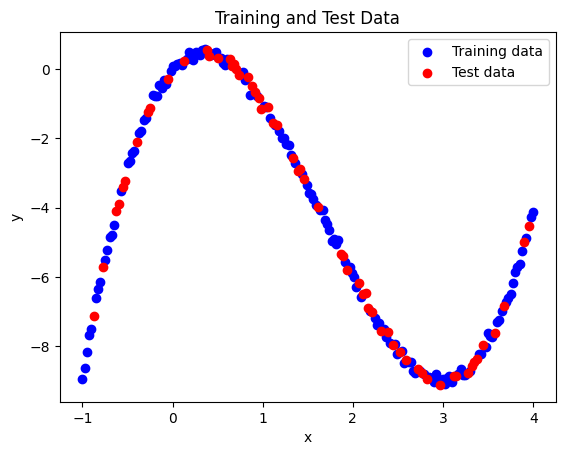

In [180]:
# 1. Load train.csv and test.csv.
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

# extract feature x and target y. 
x_train = train_set['x'].values
y_train = train_set['y'].values
x_test = test_set['x'].values
y_test = test_set['y'].values

# plot the data points (x_i, y_i) using plt.scatter. Plot trianing points in blue and test points in red.
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training and Test Data')
plt.legend()
plt.show()



In [181]:
# 2. Assume a model of the form: y = theta_0 + theta_1 * x.
# a. Use the closed form solution to find optimial theta_0 and theta_1.
# First, construct the matrix X and the target y from the training set. 
matrix_x = np.vstack((np.ones(len(x_train)), x_train)).T
y_train_vector = y_train.reshape(-1, 1)
print(matrix_x.shape, y_train_vector.shape)
print(y_train_vector[:5])
print(matrix_x[:5])
# Then solve for theta. 
theta = np.linalg.inv(matrix_x.T @ matrix_x) @ matrix_x.T @ y_train_vector
theta_0, theta_1 = theta.flatten()
print(theta_0, theta_1)

# Finally, calculate the MSE (Mean Squared Error) on the training set and test set. *specifics included. 
def mse(n, y_i, theta_0, theta_1, x_i):
    return 1.0 /n * sum(y_i -(theta_0 + theta_1 * x_i))**2

y_train_pred = theta_0 + theta_1 * x_train
y_test_pred = theta_0 + theta_1 * x_test
train_mse = mse(y_train.shape[0], y_train, theta_0, theta_1, y_train_pred)
test_mse = mse(y_test.shape[0], y_test, theta_0, theta_1, y_test_pred)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


(140, 2) (140, 1)
[[-8.81792555]
 [-3.02134125]
 [-0.73333637]
 [-4.85152845]
 [-0.55837303]]
[[ 1.          3.24623116]
 [ 1.          1.43718593]
 [ 1.         -0.22110553]
 [ 1.         -0.69849246]
 [ 1.         -0.12060302]]
-2.4461379810161716 -1.3618869890538665
Train MSE: 9150.766525224419
Test MSE: 3966.600955487962


Iteration 0, Loss: 974.6863370379317
Iteration 2, Loss: 974.6863370379317
Iteration 4, Loss: 974.6863370379317
Iteration 6, Loss: 974.6863370379317
Iteration 8, Loss: 974.6863370407077
Iteration 10, Loss: 974.6864139780697
Final Loss: 974.6864139780697
[-2.4460218  -1.36157524]


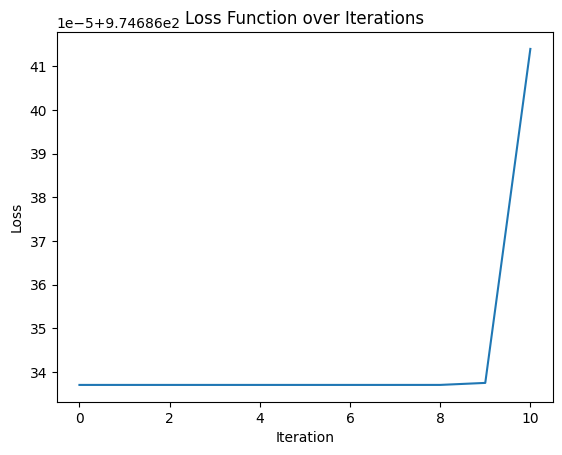

In [182]:
# b. Gradient Descent
# Implement the gradient descent algorithm to find theta_0 and theta_1.

# loss function:
def loss():
    return np.linalg.norm(matrix_x @ theta - y_train_vector)**2

# gradient:
def gradient():
    return 2 * matrix_x.T @ (matrix_x @ theta - y_train_vector)

# gradient descent update:
def update():
    return theta - alpha * gradient()

# initialize theta and alpha
theta_0 = np.zeros((2, 1))
theta_1 = np.zeros((2, 1))
alpha = 0.01
num_iterations = 100
losses = []
for i in range(num_iterations):
    theta = update()
    losses.append(loss())
    if i % 2 == 0:
        print(f'Iteration {i}, Loss: {loss()}')
    if len(losses) > 10 and np.mean(losses[-10:]) - np.mean(losses[-20:-10]) < 0.01:
        break
print(f'Final Loss: {loss()}')
print(theta.flatten())

# calculate the MSE on the training set and test set.
train_mse = mse(y_train.shape[0], y_train, theta_0, theta_1, y_train_pred)
test_mse = mse(y_test.shape[0], y_test, theta_0, theta_1, y_test_pred)


# loss spikes drastically at iteration 10-20. 

# 3. Plot the loss function over iterations.

plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations')
plt.show()




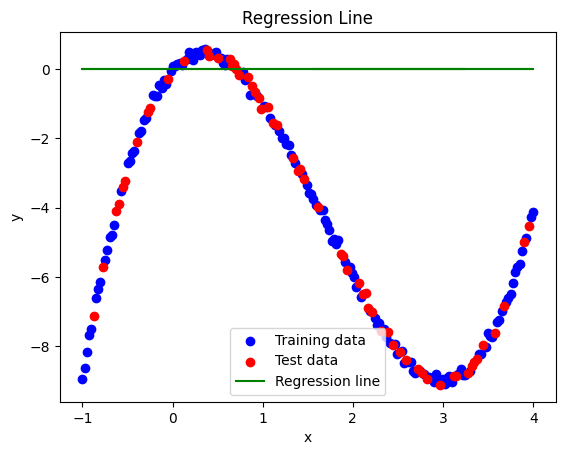

In [184]:
# plot the regression line
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
theta_0_scalar = theta_0[0, 0]
theta_1_scalar = theta_1[0, 0]
plt.plot(x_train, theta_0_scalar + theta_1_scalar * x_train, color='green', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()
plt.show()

In [185]:
# c. Compare and discuss:
    # Parameter comparison
    # Error comparison
    # Plotting


In [186]:
# 3. Assume a quadratic model of the form: y = theta_0 + theta_1 * x + theta_2 * x^2.
# a. Use the closed form solution to find optimial theta_0, theta_1, and theta_2.
# b. Gradient Descent
# c. Compare and discuss:
    # Parameter compairson
    # Error comparison
    # Plotting
# note the changes: construct the matrix X and the target y from the training set.


In [187]:
# 4. Assume a cubic model of the form: y = theta_0 + theta_1 * x + theta_2 * x^2 + theta_3 * x^3.
# a. Use the closed form solution to find optimial theta_0, theta_1, theta_2, and theta_3.
# b. Gradient Descent
# c. Compare and discuss:
    # Parameter compairson
    # Error comparison
    # Plotting
# note the changes: construct the matrix X and the target y from the training set.